### Imports

In [66]:
# Imports
from matplotlib import pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay


### Loading Diabetes dataset and storing it in a panda dataframe


In [67]:
df = pd.read_csv('diabetes.csv')
df = df.dropna();
df.dropna(inplace=True)
a = ['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age']
for i in a:
  x = df[i].mean()
  df[i].fillna(x, inplace=True)
print(df)

     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  Outcome  
0                       0.627   50        1  
1                  

In [68]:
y = df['Outcome']
X = df.drop('Outcome', axis=1)

print(X)
print(y)

     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  
0                       0.627   50  
1                       0.351   31  


In [69]:
# now we can split the dataset into training and testing dataset according to any ratio as per the 'train_test_split' function of sklearn.model_selection module:
# train_X, test_X, train_y, test_y = train_test_split(X, y, random_state=None, test_size = 0.2)
# since we have to use the same piece of code again and again (except for different parameters),
# a function can be defined for calculating the various measures of the decision tree model for the sake of code re-usability

def decision_tree_model_diabetes(test_ratio, X, y, criterion_string="entropy"):
  train_X, test_X, train_y, test_y = train_test_split(X, y, random_state=1, test_size = test_ratio)
  decision_tree_model = DecisionTreeClassifier(random_state=None, max_depth = 3, criterion=criterion_string)
  decision_tree_model.fit(train_X, train_y)

  pred_y = decision_tree_model.predict(test_X)
  print("Classification report for decision tree model:\n")
  print(classification_report(y_true = test_y, y_pred=pred_y))
  cm = confusion_matrix(test_y, pred_y)
  print("Confusion Matrix: ")
  print(cm)

  fig, ax = plt.subplots(figsize=(8, 6))
  cm_display = (ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=decision_tree_model.classes_))
  cm_display.plot(ax=ax, cmap='YlGn', values_format='d')

  # Add a title and labels
  ax.set_title('Confusion Matrix')
  ax.set_xlabel('Predicted Label')
  ax.set_ylabel('True Label')

  # Adjust the layout to avoid overlapping
  plt.tight_layout()
  # Show the Confusion Matrix
  plt.show()

  # Create a figure and axis for the decision tree plot
  fig, ax = plt.subplots(figsize=(12, 8))

  # Plot the decision tree
  tree.plot_tree(decision_tree_model, feature_names=a, class_names=['non-diabetic','diabetic'], filled=True, rounded=True, ax=ax)

  # Add a title
  ax.set_title('Decision Tree Plot')

  # Adjust the layout to avoid overlapping
  plt.tight_layout()

  # Show the decision tree plot
  plt.show()

Classification report for decision tree model:

              precision    recall  f1-score   support

           0       0.82      0.86      0.84        99
           1       0.72      0.65      0.69        55

    accuracy                           0.79       154
   macro avg       0.77      0.76      0.76       154
weighted avg       0.78      0.79      0.78       154

Confusion Matrix: 
[[85 14]
 [19 36]]


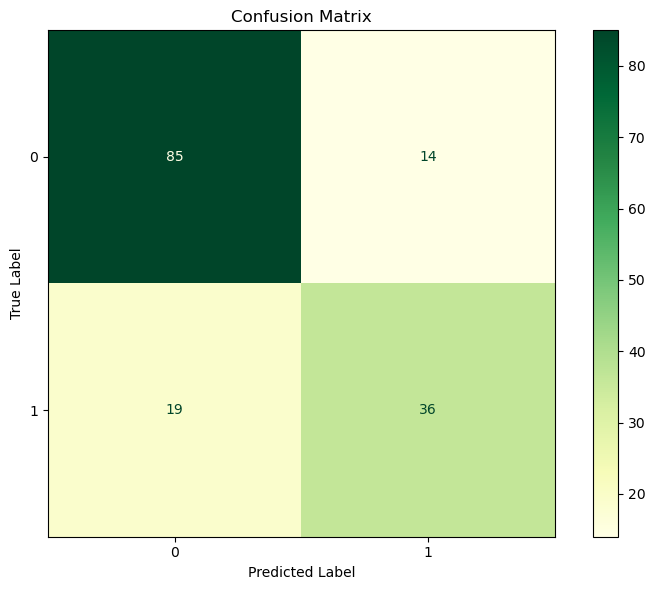

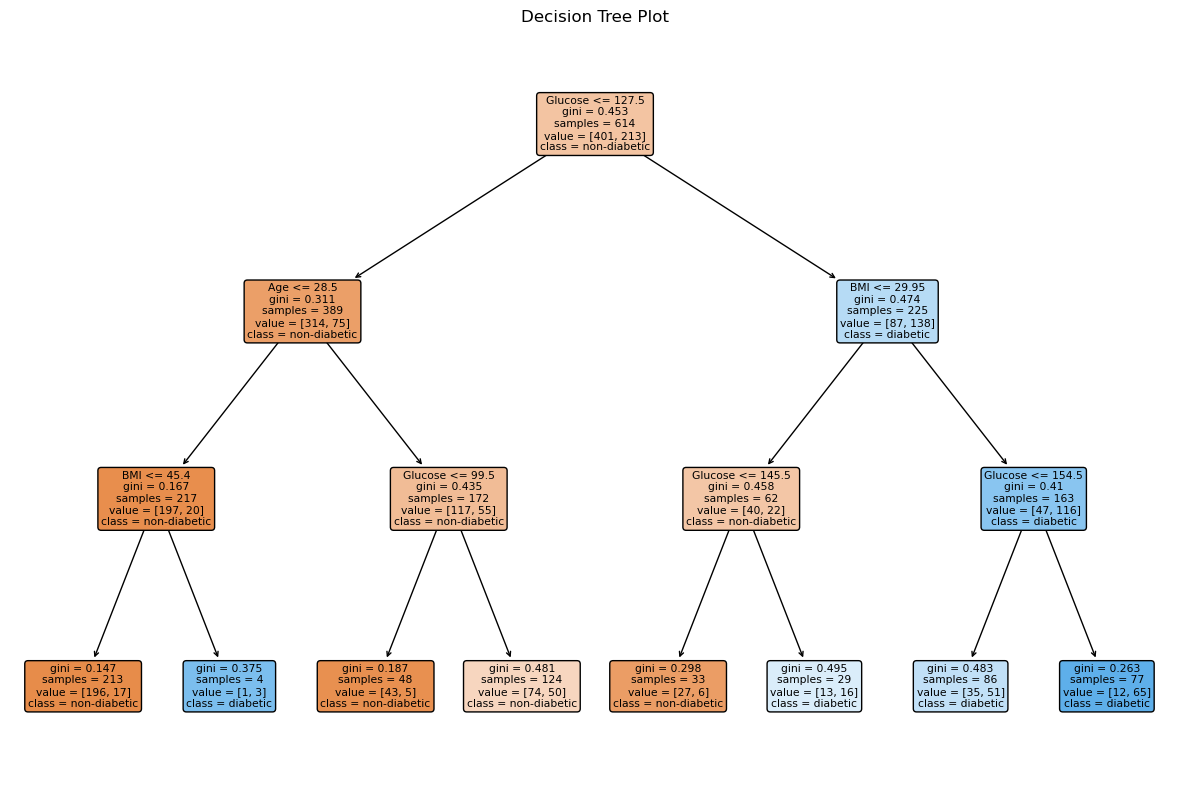

In [70]:
decision_tree_model_diabetes(0.2, X, y, "gini")

### Naive-Bayes Classification

In [76]:
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB

def multinomialNB_model_diabetes(test_ratio, X, y):
  train_X, test_X, train_y, test_y = train_test_split(X, y, random_state=None, test_size = test_ratio)

  model = MultinomialNB()
  model.fit(train_X, train_y)

  pred_y = model.predict(test_X)
  print("Classification report for decision tree model:\n")
  print(classification_report(y_true = test_y, y_pred=pred_y))
  cm = confusion_matrix(test_y, pred_y)
  print(cm)

  fig, ax = plt.subplots(figsize=(8, 6))
  cm_display = (ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_))
  cm_display.plot(ax=ax, cmap='YlGn', values_format='d')

  # Add a title and labels
  ax.set_title('Confusion Matrix')
  ax.set_xlabel('Predicted Label')
  ax.set_ylabel('True Label')

  # Adjust the layout to avoid overlapping
  plt.tight_layout()
  # Show the Confusion Matrix
  plt.show()

def gaussianNB_model_diabetes(test_ratio, X, y, smooth = 1e-9):
  train_X, test_X, train_y, test_y = train_test_split(X, y, random_state=None, test_size = test_ratio)
  model = GaussianNB(var_smoothing=smooth)
  model.fit(train_X, train_y)

  pred_y = model.predict(test_X)
  print("Classification report for decision tree model:\n")
  print(classification_report(y_true = test_y, y_pred=pred_y))
  cm = confusion_matrix(test_y, pred_y)
  print(cm)

  fig, ax = plt.subplots(figsize=(8, 6))
  cm_display = (ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_))
  cm_display.plot(ax=ax, cmap='YlGn', values_format='d')

  # Add a title and labels
  ax.set_title('Confusion Matrix')
  ax.set_xlabel('Predicted Label')
  ax.set_ylabel('True Label')

  # Adjust the layout to avoid overlapping
  plt.tight_layout()
  # Show the Confusion Matrix
  plt.show()

def bernoulliNB_model_diabetes(test_ratio, X, y):
  train_X, test_X, train_y, test_y = train_test_split(X, y, random_state=None, test_size = test_ratio)
  scaler = StandardScaler()
  train_X = scaler.fit_transform(train_X)
  test_X = scaler.transform(test_X)

  model = BernoulliNB()
  model.fit(train_X, train_y)

  pred_y = model.predict(test_X)
  print("Classification report for decision tree model:\n")
  print(classification_report(y_true = test_y, y_pred=pred_y))
  cm = confusion_matrix(test_y, pred_y)
  print(cm)

  fig, ax = plt.subplots(figsize=(8, 6))
  cm_display = (ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_))
  cm_display.plot(ax=ax, cmap='YlGn', values_format='d')

  # Add a title and labels
  ax.set_title('Confusion Matrix')
  ax.set_xlabel('Predicted Label')
  ax.set_ylabel('True Label')

  # Adjust the layout to avoid overlapping
  plt.tight_layout()
  # Show the Confusion Matrix
  plt.show()

Classification report for decision tree model:

              precision    recall  f1-score   support

           0       0.58      0.64      0.61        89
           1       0.42      0.35      0.38        65

    accuracy                           0.52       154
   macro avg       0.50      0.50      0.49       154
weighted avg       0.51      0.52      0.51       154

[[57 32]
 [42 23]]


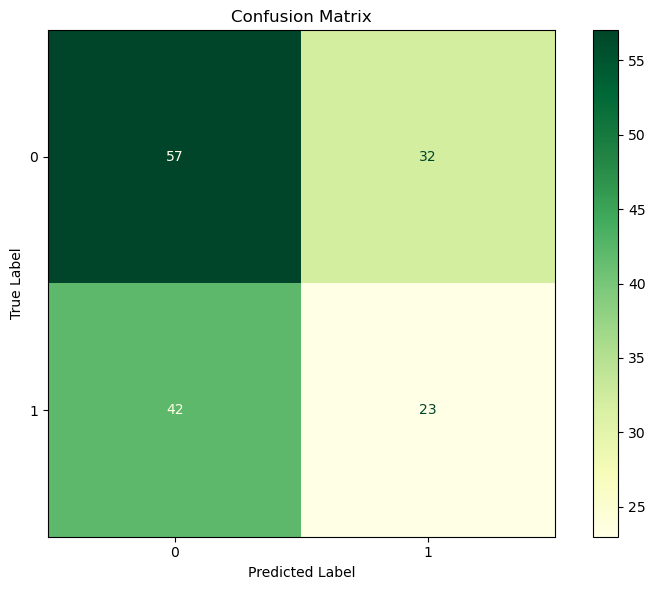

In [77]:
multinomialNB_model_diabetes(0.2,X,y)